In [15]:
import pandas as pd, geopandas as gpd, numpy as np

# Dataframes

## Sendas

In [16]:
sendas = gpd.read_file('../Raw_Datasets/Trabajado/spacmsendasnaturaleza.json')

In [17]:
sendas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            224 non-null    object  
 1   CDID          224 non-null    int64   
 2   CD_SENDA      95 non-null     object  
 3   DS_NOMBRE     224 non-null    object  
 4   CD_CATEGORIA  224 non-null    object  
 5   DS_CATEGORIA  224 non-null    object  
 6   DS_INICIO     224 non-null    object  
 7   DS_FINAL      221 non-null    object  
 8   DS_LONGITUD   224 non-null    object  
 9   CD_SUBCAT     68 non-null     object  
 10  DS_SUBCAT     68 non-null     object  
 11  DS_ENP        122 non-null    object  
 12  COLOR_FILL    224 non-null    object  
 13  COLOR_STROKE  224 non-null    object  
 14  geometry      224 non-null    geometry
dtypes: geometry(1), int64(1), object(13)
memory usage: 26.4+ KB


In [18]:
sendas = sendas.drop(columns=['COLOR_FILL', 'COLOR_STROKE', 'CD_SUBCAT', 'DS_SUBCAT', 'CD_SENDA', 'id'])

In [19]:
sendas.head(3)

,CDID,DS_NOMBRE,CD_CATEGORIA,DS_CATEGORIA,DS_INICIO,DS_FINAL,DS_LONGITUD,DS_ENP,geometry
0,131,Paseos por el Valle de El Paular. Camino de Ra...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,Parque Nacional de la Sierra de Guadarrama,"LINESTRING (426199.309 4528647.264, 426203.466..."
1,132,Paseos por el Valle de El Paular: Camino a la ...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,Parque Nacional de la Sierra de Guadarrama,"LINESTRING (425284.437 4526628.865, 425313.908..."
2,140,Senda Soto Bayona: Tramo adaptado,ENP,Rutas por la Red de Espacios Naturales Protegidos,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,Parque Regional del Sureste,"LINESTRING (451150.280 4443398.392, 451146.138..."


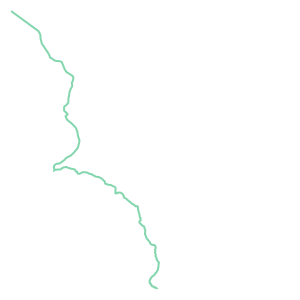

In [20]:
sendas['geometry'][1]

In [21]:
sendas.rename(columns= {'DS_NOMBRE': 'NOMBRE',
                        'DS_INICIO' :'INICIO',
                        'DS_FINAL' : 'FINAL',
                        'DS_LONGITUD' : 'DISTANCIA KM'}, inplace=True)

In [22]:
sendas['geometry']

0      LINESTRING (426199.309 4528647.264, 426203.466...
1      LINESTRING (425284.437 4526628.865, 425313.908...
2      LINESTRING (451150.280 4443398.392, 451146.138...
3      LINESTRING (456487.575 4463670.374, 456475.007...
4      LINESTRING (456687.875 4463375.235, 456705.337...
                             ...                        
219    LINESTRING (461647.994 4547253.457, 461671.157...
220    LINESTRING (461646.847 4547255.456, 461657.912...
221    MULTILINESTRING ((462663.574 4541139.099, 4626...
222    LINESTRING (454540.099 4543738.587, 454535.257...
223    LINESTRING (393549.921 4494661.829, 393547.818...
Name: geometry, Length: 224, dtype: geometry

In [23]:
import utm

def utm_to_latlon(coords_list):
    return [utm.to_latlon(easting, northing, 30, "T") for easting, northing in coords_list]

def convert_to_latlon(geometry):
    if geometry.type == "LineString":
        return utm_to_latlon(geometry.coords)
    elif geometry.type == "MultiLineString":
        result = []
        for line_string in geometry.geoms:
            result.extend(utm_to_latlon(line_string.coords))
        return result
    else:
        raise ValueError(f"Tipo de geometría no soportada: {geometry.type}")

sendas["lat_lon_list"] = sendas["geometry"].apply(convert_to_latlon)

C:\Users\OY\AppData\Local\Temp\ipykernel_28768\2676304331.py:7: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == "LineString":
C:\Users\OY\AppData\Local\Temp\ipykernel_28768\2676304331.py:9: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geometry.type == "MultiLineString":


In [24]:
sendas['lat_lon_list'][0]

[(40.905598698613964, -3.8762650172744095),
 (40.905684658127626, -3.876216794548245),
 (40.90607483403453, -3.8750352854270984),
 (40.90634667981597, -3.8744829540559764),
 (40.90655202289854, -3.874143555734919),
 (40.90673157710159, -3.873996249777089),
 (40.906918512648886, -3.873945256080874),
 (40.90706449331332, -3.873947176823138),
 (40.90756257586244, -3.87392610607897),
 (40.90772732579657, -3.8738874347628323),
 (40.90793128808846, -3.8735523277812103),
 (40.90804717552781, -3.8732438157960547),
 (40.90812948905294, -3.8730845335899238),
 (40.90813913595174, -3.8728815338461096),
 (40.90811105013767, -3.872629566267713),
 (40.90805445287098, -3.8722817295992957),
 (40.9080005697375, -3.871795592849578),
 (40.90801037855406, -3.871443863720431),
 (40.908087101214946, -3.871180993883108),
 (40.908326649352674, -3.8706068243615994),
 (40.9085017985342, -3.8699676624091213),
 (40.90861093587457, -3.86947730509904),
 (40.90864511811299, -3.868708000114443),
 (40.90867540184789, -

In [25]:
def convert_tuples_to_lists(tup_list):
    return [list(tup) for tup in tup_list]

# Aplicar la función a la columna 'lat_lon_list' usando apply y lambda
sendas['lat_lon_list'] = sendas['lat_lon_list'].apply(lambda x: convert_tuples_to_lists(x))
sendas['lat_lon_list'][0]

[[40.905598698613964, -3.8762650172744095],
 [40.905684658127626, -3.876216794548245],
 [40.90607483403453, -3.8750352854270984],
 [40.90634667981597, -3.8744829540559764],
 [40.90655202289854, -3.874143555734919],
 [40.90673157710159, -3.873996249777089],
 [40.906918512648886, -3.873945256080874],
 [40.90706449331332, -3.873947176823138],
 [40.90756257586244, -3.87392610607897],
 [40.90772732579657, -3.8738874347628323],
 [40.90793128808846, -3.8735523277812103],
 [40.90804717552781, -3.8732438157960547],
 [40.90812948905294, -3.8730845335899238],
 [40.90813913595174, -3.8728815338461096],
 [40.90811105013767, -3.872629566267713],
 [40.90805445287098, -3.8722817295992957],
 [40.9080005697375, -3.871795592849578],
 [40.90801037855406, -3.871443863720431],
 [40.908087101214946, -3.871180993883108],
 [40.908326649352674, -3.8706068243615994],
 [40.9085017985342, -3.8699676624091213],
 [40.90861093587457, -3.86947730509904],
 [40.90864511811299, -3.868708000114443],
 [40.90867540184789, -

In [26]:
sendas['lat_lon_list'][4]

[[40.3197791134375, -3.5097920954715267],
 [40.31959886372623, -3.509585203722439],
 [40.31941853135838, -3.5093969974954966],
 [40.31926280238282, -3.509034583820895],
 [40.319182442370355, -3.5087802764228426],
 [40.31916997449793, -3.5087398526862392],
 [40.31895092544456, -3.508140291378639],
 [40.318678241731675, -3.507540332319038],
 [40.31834612711535, -3.506630701070146],
 [40.31820192639688, -3.5060830956025306],
 [40.31816090034609, -3.5056530413206954],
 [40.318157462276446, -3.504802862129184],
 [40.318177458257054, -3.504317208876117],
 [40.31822648287206, -3.503733676366773],
 [40.31844378372635, -3.5030976734502084],
 [40.31853412421597, -3.502878797630843],
 [40.318653351925846, -3.5025947385508407],
 [40.318765286084904, -3.5023433229277354],
 [40.31890220721543, -3.5021014340238334],
 [40.31902102773555, -3.5019107936846288],
 [40.3191040327897, -3.501733901274384],
 [40.31917647327357, -3.501519560301283],
 [40.319209765717346, -3.501262888101616],
 [40.3192214228878

In [27]:
sendas.drop(columns='geometry', inplace=True)

In [28]:
sendas.head(2)

,CDID,NOMBRE,CD_CATEGORIA,DS_CATEGORIA,INICIO,FINAL,DISTANCIA KM,DS_ENP,lat_lon_list
0,131,Paseos por el Valle de El Paular. Camino de Ra...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,Parque Nacional de la Sierra de Guadarrama,"[[40.905598698613964, -3.8762650172744095], [4..."
1,132,Paseos por el Valle de El Paular: Camino a la ...,ENP,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,Parque Nacional de la Sierra de Guadarrama,"[[40.887335296390866, -3.8868835643175763], [4..."


In [29]:
sendas = sendas.drop(columns= ['CDID', 'CD_CATEGORIA', 'DS_ENP'])
sendas.head(5)

,NOMBRE,DS_CATEGORIA,INICIO,FINAL,DISTANCIA KM,lat_lon_list
0,Paseos por el Valle de El Paular. Camino de Ra...,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,"[[40.905598698613964, -3.8762650172744095], [4..."
1,Paseos por el Valle de El Paular: Camino a la ...,Rutas por la Red de Espacios Naturales Protegidos,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,"[[40.887335296390866, -3.8868835643175763], [4..."
2,Senda Soto Bayona: Tramo adaptado,Rutas por la Red de Espacios Naturales Protegidos,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,"[[40.13950232543426, -3.5734478536309267], [40..."
3,Un paseo por El Campillo: el Agua,Rutas por la Red de Espacios Naturales Protegidos,Cortados de Rivas (a 150 m del aparcamiento),Cortados de Rivas (aparcamiento),5,"[[40.32242758620203, -3.5121696695195457], [40..."
4,Un paseo por El Campillo: el Agua. Tramo de se...,Rutas por la Red de Espacios Naturales Protegidos,Cortados de Rivas (a 150 m del aparcamiento),Unos 150 m una vez que se deja a la izquierda ...,1,"[[40.3197791134375, -3.5097920954715267], [40...."


In [30]:
sendas.drop(columns='DS_CATEGORIA', inplace=True)

In [31]:
sendas.lat_lon_list.iloc[221]

[[41.02060244504218, -3.4440823482548075],
 [41.02060368549644, -3.444082106811828],
 [41.0122936858988, -3.4448358262460967],
 [41.012331232014596, -3.444638071298299],
 [41.01236865175673, -3.444473936740977],
 [41.01239995338288, -3.444429315697401],
 [41.0124706693987, -3.4444372618394463],
 [41.012578101846636, -3.4444641344569384],
 [41.012742545355415, -3.4443830461032263],
 [41.01299477303207, -3.4442875956427743],
 [41.01309112820669, -3.444250883266142],
 [41.01329790634503, -3.4441999633432996],
 [41.01355888110852, -3.444037323623676],
 [41.013641201644404, -3.4439706261944636],
 [41.01378280728666, -3.4439416866492127],
 [41.01394753723426, -3.443785869952308],
 [41.014058602772245, -3.443603544819539],
 [41.014126830867724, -3.4435218096188387],
 [41.01421490064787, -3.4434327302373635],
 [41.014370710619296, -3.4433889387046612],
 [41.01445299036361, -3.443333449667674],
 [41.014629425757356, -3.443076835733708],
 [41.01483488235788, -3.442749602617985],
 [41.01516744032

In [32]:
# Función para detectar el encoding

import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        rawdata = file.read()
    result = chardet.detect(rawdata)
    return result['encoding']


In [33]:
detect_encoding('../Raw_Datasets/Trabajado/200215-0-instalaciones-deportivas.csv')

'ISO-8859-1'

In [34]:
sendas[['LATITUD', 'LONGITUD']] = sendas['lat_lon_list'].apply(lambda x: pd.Series(zip(*x)))
sendas.head(2)

,NOMBRE,INICIO,FINAL,DISTANCIA KM,lat_lon_list,LATITUD,LONGITUD
0,Paseos por el Valle de El Paular. Camino de Ra...,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,"[[40.905598698613964, -3.8762650172744095], [4...","(40.905598698613964, 40.905684658127626, 40.90...","(-3.8762650172744095, -3.876216794548245, -3.8..."
1,Paseos por el Valle de El Paular: Camino a la ...,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,"[[40.887335296390866, -3.8868835643175763], [4...","(40.887335296390866, 40.88714476891775, 40.885...","(-3.8868835643175763, -3.8865312002598196, -3...."


In [35]:
sendas.LATITUD[0]

(40.905598698613964,
 40.905684658127626,
 40.90607483403453,
 40.90634667981597,
 40.90655202289854,
 40.90673157710159,
 40.906918512648886,
 40.90706449331332,
 40.90756257586244,
 40.90772732579657,
 40.90793128808846,
 40.90804717552781,
 40.90812948905294,
 40.90813913595174,
 40.90811105013767,
 40.90805445287098,
 40.9080005697375,
 40.90801037855406,
 40.908087101214946,
 40.908326649352674,
 40.9085017985342,
 40.90861093587457,
 40.90864511811299,
 40.90867540184789,
 40.90864762323685,
 40.90869419709488,
 40.90870508467124,
 40.90874008337979,
 40.90877939118686,
 40.9088797598277,
 40.909053357548814,
 40.909192831164056,
 40.90943845622932,
 40.90974077094817,
 40.90995411461883,
 40.91034430325842,
 40.91059923275582,
 40.91084692993651,
 40.91110305373325,
 40.911189067091826,
 40.91151438867106,
 40.911816687531285,
 40.91218658149622,
 40.91237606004949,
 40.91250709482702,
 40.91263932426452,
 40.91284080601996,
 40.912915864330145,
 40.91311448128248,
 40.913135720

In [36]:
sendas['TIPO'] = 'SENDA'
sendas

,NOMBRE,INICIO,FINAL,DISTANCIA KM,lat_lon_list,LATITUD,LONGITUD,TIPO
0,Paseos por el Valle de El Paular. Camino de Ra...,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,"[[40.905598698613964, -3.8762650172744095], [4...","(40.905598698613964, 40.905684658127626, 40.90...","(-3.8762650172744095, -3.876216794548245, -3.8...",SENDA
1,Paseos por el Valle de El Paular: Camino a la ...,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,"[[40.887335296390866, -3.8868835643175763], [4...","(40.887335296390866, 40.88714476891775, 40.885...","(-3.8868835643175763, -3.8865312002598196, -3....",SENDA
2,Senda Soto Bayona: Tramo adaptado,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,"[[40.13950232543426, -3.5734478536309267], [40...","(40.13950232543426, 40.13953763500539, 40.1395...","(-3.5734478536309267, -3.573496769403926, -3.5...",SENDA
3,Un paseo por El Campillo: el Agua,Cortados de Rivas (a 150 m del aparcamiento),Cortados de Rivas (aparcamiento),5,"[[40.32242758620203, -3.5121696695195457], [40...","(40.32242758620203, 40.3224340820336, 40.32242...","(-3.5121696695195457, -3.5123176484080925, -3....",SENDA
4,Un paseo por El Campillo: el Agua. Tramo de se...,Cortados de Rivas (a 150 m del aparcamiento),Unos 150 m una vez que se deja a la izquierda ...,1,"[[40.3197791134375, -3.5097920954715267], [40....","(40.3197791134375, 40.31959886372623, 40.31941...","(-3.5097920954715267, -3.509585203722439, -3.5...",SENDA
...,...,...,...,...,...,...,...,...
219,Senda de Molino a Molino,"La Hiruela, saliendo del pueblo por la izquier...","La Hiruela, saliendo del pueblo por la izquier...",4,"[[41.07563265812039, -3.4565419120469554], [41...","(41.07563265812039, 41.075960483243676, 41.075...","(-3.4565419120469554, -3.456268449896243, -3.4...",SENDA
220,Senda por las eras y la pila de riego,"La Hiruela, c/ Pilón","La Hiruela, c/ Pilón",3,"[[41.07565060528044, -3.4565556900596115], [41...","(41.07565060528044, 41.07583581200505, 41.0759...","(-3.4565556900596115, -3.4564252478796584, -3....",SENDA
221,Senda de los Robles Centenarios,"Puebla de la Sierra, c/ de la Fuente de Abajo","Puebla de la Sierra, c/ de la Fuente de Abajo",3,"[[41.02060244504218, -3.4440823482548075], [41...","(41.02060244504218, 41.02060368549644, 41.0122...","(-3.4440823482548075, -3.444082106811828, -3.4...",SENDA
222,Senda Rodeando la Dehesa Boyal Lomo Peral,Depósito de agua de Prádena del Rincón,Depósito de agua de Prádena del Rincón,5,"[[41.04360532386895, -3.5408914563171012], [41...","(41.04360532386895, 41.043574518941305, 41.043...","(-3.5408914563171012, -3.5409488161489224, -3....",SENDA


In [37]:
sendainicio = sendas.drop(columns= ['LATITUD', 'LONGITUD'])

In [38]:
sendainicio[['LATITUD', 'LONGITUD']] = sendainicio['lat_lon_list'].apply(lambda x: pd.Series(x[0]))
sendainicio.head(5)

,NOMBRE,INICIO,FINAL,DISTANCIA KM,lat_lon_list,TIPO,LATITUD,LONGITUD
0,Paseos por el Valle de El Paular. Camino de Ra...,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,"[[40.905598698613964, -3.8762650172744095], [4...",SENDA,40.905599,-3.876265
1,Paseos por el Valle de El Paular: Camino a la ...,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,"[[40.887335296390866, -3.8868835643175763], [4...",SENDA,40.887335,-3.886884
2,Senda Soto Bayona: Tramo adaptado,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,"[[40.13950232543426, -3.5734478536309267], [40...",SENDA,40.139502,-3.573448
3,Un paseo por El Campillo: el Agua,Cortados de Rivas (a 150 m del aparcamiento),Cortados de Rivas (aparcamiento),5,"[[40.32242758620203, -3.5121696695195457], [40...",SENDA,40.322428,-3.512170
4,Un paseo por El Campillo: el Agua. Tramo de se...,Cortados de Rivas (a 150 m del aparcamiento),Unos 150 m una vez que se deja a la izquierda ...,1,"[[40.3197791134375, -3.5097920954715267], [40....",SENDA,40.319779,-3.509792


In [39]:
sendas.drop(columns='lat_lon_list', inplace=True)
sendas

,NOMBRE,INICIO,FINAL,DISTANCIA KM,LATITUD,LONGITUD,TIPO
0,Paseos por el Valle de El Paular. Camino de Ra...,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,"(40.905598698613964, 40.905684658127626, 40.90...","(-3.8762650172744095, -3.876216794548245, -3.8...",SENDA
1,Paseos por el Valle de El Paular: Camino a la ...,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,"(40.887335296390866, 40.88714476891775, 40.885...","(-3.8868835643175763, -3.8865312002598196, -3....",SENDA
2,Senda Soto Bayona: Tramo adaptado,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,"(40.13950232543426, 40.13953763500539, 40.1395...","(-3.5734478536309267, -3.573496769403926, -3.5...",SENDA
3,Un paseo por El Campillo: el Agua,Cortados de Rivas (a 150 m del aparcamiento),Cortados de Rivas (aparcamiento),5,"(40.32242758620203, 40.3224340820336, 40.32242...","(-3.5121696695195457, -3.5123176484080925, -3....",SENDA
4,Un paseo por El Campillo: el Agua. Tramo de se...,Cortados de Rivas (a 150 m del aparcamiento),Unos 150 m una vez que se deja a la izquierda ...,1,"(40.3197791134375, 40.31959886372623, 40.31941...","(-3.5097920954715267, -3.509585203722439, -3.5...",SENDA
...,...,...,...,...,...,...,...
219,Senda de Molino a Molino,"La Hiruela, saliendo del pueblo por la izquier...","La Hiruela, saliendo del pueblo por la izquier...",4,"(41.07563265812039, 41.075960483243676, 41.075...","(-3.4565419120469554, -3.456268449896243, -3.4...",SENDA
220,Senda por las eras y la pila de riego,"La Hiruela, c/ Pilón","La Hiruela, c/ Pilón",3,"(41.07565060528044, 41.07583581200505, 41.0759...","(-3.4565556900596115, -3.4564252478796584, -3....",SENDA
221,Senda de los Robles Centenarios,"Puebla de la Sierra, c/ de la Fuente de Abajo","Puebla de la Sierra, c/ de la Fuente de Abajo",3,"(41.02060244504218, 41.02060368549644, 41.0122...","(-3.4440823482548075, -3.444082106811828, -3.4...",SENDA
222,Senda Rodeando la Dehesa Boyal Lomo Peral,Depósito de agua de Prádena del Rincón,Depósito de agua de Prádena del Rincón,5,"(41.04360532386895, 41.043574518941305, 41.043...","(-3.5408914563171012, -3.5409488161489224, -3....",SENDA


In [40]:
sendainicio

,NOMBRE,INICIO,FINAL,DISTANCIA KM,lat_lon_list,TIPO,LATITUD,LONGITUD
0,Paseos por el Valle de El Paular. Camino de Ra...,"Puente del Perdón, Monasterio de El Paular",Plaza de la Fragua de Oteruelo,2,"[[40.905598698613964, -3.8762650172744095], [4...",SENDA,40.905599,-3.876265
1,Paseos por el Valle de El Paular: Camino a la ...,"Puente del Perdón, Monasterio de El Paular",Cascada del Purgatorio,6,"[[40.887335296390866, -3.8868835643175763], [4...",SENDA,40.887335,-3.886884
2,Senda Soto Bayona: Tramo adaptado,Aparcamiento situado al noroeste del casco urb...,Observatorio de fauna,1,"[[40.13950232543426, -3.5734478536309267], [40...",SENDA,40.139502,-3.573448
3,Un paseo por El Campillo: el Agua,Cortados de Rivas (a 150 m del aparcamiento),Cortados de Rivas (aparcamiento),5,"[[40.32242758620203, -3.5121696695195457], [40...",SENDA,40.322428,-3.512170
4,Un paseo por El Campillo: el Agua. Tramo de se...,Cortados de Rivas (a 150 m del aparcamiento),Unos 150 m una vez que se deja a la izquierda ...,1,"[[40.3197791134375, -3.5097920954715267], [40....",SENDA,40.319779,-3.509792
...,...,...,...,...,...,...,...,...
219,Senda de Molino a Molino,"La Hiruela, saliendo del pueblo por la izquier...","La Hiruela, saliendo del pueblo por la izquier...",4,"[[41.07563265812039, -3.4565419120469554], [41...",SENDA,41.075633,-3.456542
220,Senda por las eras y la pila de riego,"La Hiruela, c/ Pilón","La Hiruela, c/ Pilón",3,"[[41.07565060528044, -3.4565556900596115], [41...",SENDA,41.075651,-3.456556
221,Senda de los Robles Centenarios,"Puebla de la Sierra, c/ de la Fuente de Abajo","Puebla de la Sierra, c/ de la Fuente de Abajo",3,"[[41.02060244504218, -3.4440823482548075], [41...",SENDA,41.020602,-3.444082
222,Senda Rodeando la Dehesa Boyal Lomo Peral,Depósito de agua de Prádena del Rincón,Depósito de agua de Prádena del Rincón,5,"[[41.04360532386895, -3.5408914563171012], [41...",SENDA,41.043605,-3.540891


In [41]:
sendainicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NOMBRE        224 non-null    object 
 1   INICIO        224 non-null    object 
 2   FINAL         221 non-null    object 
 3   DISTANCIA KM  224 non-null    object 
 4   lat_lon_list  224 non-null    object 
 5   TIPO          224 non-null    object 
 6   LATITUD       224 non-null    float64
 7   LONGITUD      224 non-null    float64
dtypes: float64(2), object(6)
memory usage: 14.1+ KB


In [42]:
sendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NOMBRE        224 non-null    object
 1   INICIO        224 non-null    object
 2   FINAL         221 non-null    object
 3   DISTANCIA KM  224 non-null    object
 4   LATITUD       224 non-null    object
 5   LONGITUD      224 non-null    object
 6   TIPO          224 non-null    object
dtypes: object(7)
memory usage: 12.4+ KB


## Fuentes

In [43]:
fuentes = pd.read_csv('../Raw_Datasets/Trabajado/Inventario Fuentes2023.csv', sep=';')
fuentes

,CODIGO,ZONA VERDE / VIA PUBLICA,DISTRITO,DIRECCION,COMPLEMENTO_DIRECCION,"COORD, X","COORD, Y",SISTEMA DE COORDENADAS,FECHA DATOS,longitud,latitud
0,FUE_01_0001,ZV,CENTRO,PLAZA COMENDADORAS,PLAZA COMENDADORAS,"439892,4997","4475419,798",ETRS89 / UTM Zona 30N,45013,-3.708600,40.427243
1,FUE_01_0002,ZV,CENTRO,JARDINES CONDE DUQUE,JARDINES CONDE DUQUE,"439766,5391","4475585,204",ETRS89 / UTM Zona 30N,45013,-3.710101,40.428724
2,FUE_01_0003,ZV,CENTRO,PLAZA DE LAS SALESAS,PLAZA DE LAS SALESAS,"441077,2599","4475077,763",ETRS89 / UTM Zona 30N,45013,-3.694603,40.424246
3,FUE_01_0004,ZV,CENTRO,PLAZA VILLA DE PARIS,PLAZA VILLA DE PARIS,"441281,789","4475192,9",ETRS89 / UTM Zona 30N,45013,-3.692202,40.425298
4,FUE_01_0005,ZV,CENTRO,PLAZA VILLA DE PARIS,PLAZA VILLA DE PARIS,"441199,3988","4475222,805",ETRS89 / UTM Zona 30N,45013,-3.693176,40.425562
...,...,...,...,...,...,...,...,...,...,...,...
2144,FUEP_21_0035,ZV,BARAJAS,JUAN CARLOS I,B.11 · PASEO SUR,"448355,41","4478638,03",ETRS89 / UTM Zona 30N,45013,-3.609099,40.456803
2145,FUEP_21_0036,ZV,BARAJAS,JUAN CARLOS I,B.11 · PASEO SUR,"448118,84","4478829,1",ETRS89 / UTM Zona 30N,45013,-3.611905,40.458510
2146,FUEP_21_0037,ZV,BARAJAS,JUAN CARLOS I,A.01 · PLAZA SUR,"448247,84","4478883,13",ETRS89 / UTM Zona 30N,45013,-3.610388,40.459004
2147,FUEP_21_12_0038,ZV,BARAJAS,JUAN CARLOS I,D.09 · TALUD RÍA,"448359,97","4478982,41",ETRS89 / UTM Zona 30N,45013,-3.609074,40.459906


In [44]:
fuentes = fuentes.drop(columns=['CODIGO', 'SISTEMA DE COORDENADAS', 'FECHA DATOS', 'COORD, X', 'COORD, Y', 'COMPLEMENTO_DIRECCION', 'ZONA VERDE / VIA PUBLICA'])

In [45]:
fuentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRITO   2149 non-null   object 
 1   DIRECCION  2149 non-null   object 
 2   longitud   2149 non-null   float64
 3   latitud    2149 non-null   float64
dtypes: float64(2), object(2)
memory usage: 67.3+ KB


In [46]:
fuentes.rename(columns={'longitud' : 'LONGITUD',
                        'latitud' : 'LATITUD'}, inplace=True)
fuentes

,DISTRITO,DIRECCION,LONGITUD,LATITUD
0,CENTRO,PLAZA COMENDADORAS,-3.708600,40.427243
1,CENTRO,JARDINES CONDE DUQUE,-3.710101,40.428724
2,CENTRO,PLAZA DE LAS SALESAS,-3.694603,40.424246
3,CENTRO,PLAZA VILLA DE PARIS,-3.692202,40.425298
4,CENTRO,PLAZA VILLA DE PARIS,-3.693176,40.425562
...,...,...,...,...
2144,BARAJAS,JUAN CARLOS I,-3.609099,40.456803
2145,BARAJAS,JUAN CARLOS I,-3.611905,40.458510
2146,BARAJAS,JUAN CARLOS I,-3.610388,40.459004
2147,BARAJAS,JUAN CARLOS I,-3.609074,40.459906


In [47]:
fuentes['TIPO'] = 'FUENTE'
fuentes

,DISTRITO,DIRECCION,LONGITUD,LATITUD,TIPO
0,CENTRO,PLAZA COMENDADORAS,-3.708600,40.427243,FUENTE
1,CENTRO,JARDINES CONDE DUQUE,-3.710101,40.428724,FUENTE
2,CENTRO,PLAZA DE LAS SALESAS,-3.694603,40.424246,FUENTE
3,CENTRO,PLAZA VILLA DE PARIS,-3.692202,40.425298,FUENTE
4,CENTRO,PLAZA VILLA DE PARIS,-3.693176,40.425562,FUENTE
...,...,...,...,...,...
2144,BARAJAS,JUAN CARLOS I,-3.609099,40.456803,FUENTE
2145,BARAJAS,JUAN CARLOS I,-3.611905,40.458510,FUENTE
2146,BARAJAS,JUAN CARLOS I,-3.610388,40.459004,FUENTE
2147,BARAJAS,JUAN CARLOS I,-3.609074,40.459906,FUENTE


## Centros de Salud

In [48]:
centros = pd.read_csv('..\Raw_Datasets\Trabajado\centros_de_salud.csv', sep=',')
centros

,LATITUD,LONGITUD,TIPOCEN2,TIPOVIAL,DIRECCION,NUM,MUNICIPIO
0,-3.365999,40.481648,Centro de Salud Carmen Calzado,Calle,Carmen Calzado,14,Alcalá de Henares
1,-3.350480,40.487732,Centro de Salud Juan de Austria,Avenida,Juan de Austria,19,Alcalá de Henares
2,-3.393029,40.481640,Centro de Salud La Garena,Calle,Arturo Soria,10,Alcalá de Henares
3,-3.368122,40.475056,Centro de Salud Luis Vives I y II,Calle,Luis Vives,16,Alcalá de Henares
4,-3.357354,40.482162,Centro de Salud Manuel Merino,Calle,Manuel Merino,1,Alcalá de Henares
...,...,...,...,...,...,...,...
261,-3.685277,40.192128,Centro de Salud Valdemoro,Calle,Parla,14,Valdemoro
262,-4.300194,40.274539,Centro de Salud Villa del Prado,Paseo,de la Estaciln,2,Villa del Prado
263,-4.001834,40.446805,Centro de Salud Villanueva de la Caaada,Calle,de las Eras de Móstoles,18,Villanueva de la Cañada
264,-3.275264,40.170269,Centro de Salud Villarejo de Salvanas,Calle,Hospital,7,Villarejo de Salvanés


In [49]:
centros.rename(columns={'TIPOCEN2' : 'NOMBRE'}, inplace=True)
centros

,LATITUD,LONGITUD,NOMBRE,TIPOVIAL,DIRECCION,NUM,MUNICIPIO
0,-3.365999,40.481648,Centro de Salud Carmen Calzado,Calle,Carmen Calzado,14,Alcalá de Henares
1,-3.350480,40.487732,Centro de Salud Juan de Austria,Avenida,Juan de Austria,19,Alcalá de Henares
2,-3.393029,40.481640,Centro de Salud La Garena,Calle,Arturo Soria,10,Alcalá de Henares
3,-3.368122,40.475056,Centro de Salud Luis Vives I y II,Calle,Luis Vives,16,Alcalá de Henares
4,-3.357354,40.482162,Centro de Salud Manuel Merino,Calle,Manuel Merino,1,Alcalá de Henares
...,...,...,...,...,...,...,...
261,-3.685277,40.192128,Centro de Salud Valdemoro,Calle,Parla,14,Valdemoro
262,-4.300194,40.274539,Centro de Salud Villa del Prado,Paseo,de la Estaciln,2,Villa del Prado
263,-4.001834,40.446805,Centro de Salud Villanueva de la Caaada,Calle,de las Eras de Móstoles,18,Villanueva de la Cañada
264,-3.275264,40.170269,Centro de Salud Villarejo de Salvanas,Calle,Hospital,7,Villarejo de Salvanés


In [50]:
centros['NUM'] = centros['NUM'].astype(str)

In [51]:
centros['DIRECCION'] = centros['TIPOVIAL'] + ' ' + centros['DIRECCION'] + ', ' + centros['NUM'] + ', ' + centros['MUNICIPIO']
centros = centros.drop(columns=['NUM', 'TIPOVIAL', 'MUNICIPIO'])
centros.head(5)

,LATITUD,LONGITUD,NOMBRE,DIRECCION
0,-3.365999,40.481648,Centro de Salud Carmen Calzado,"Calle Carmen Calzado, 14, Alcalá de Henares"
1,-3.350480,40.487732,Centro de Salud Juan de Austria,"Avenida Juan de Austria, 19, Alcalá de Henares"
2,-3.393029,40.481640,Centro de Salud La Garena,"Calle Arturo Soria, 10, Alcalá de Henares"
3,-3.368122,40.475056,Centro de Salud Luis Vives I y II,"Calle Luis Vives, 16, Alcalá de Henares"
4,-3.357354,40.482162,Centro de Salud Manuel Merino,"Calle Manuel Merino, 1, Alcalá de Henares"


In [52]:
centros['TIPO'] = 'CENTRO DE SALUD'
centros

,LATITUD,LONGITUD,NOMBRE,DIRECCION,TIPO
0,-3.365999,40.481648,Centro de Salud Carmen Calzado,"Calle Carmen Calzado, 14, Alcalá de Henares",CENTRO DE SALUD
1,-3.350480,40.487732,Centro de Salud Juan de Austria,"Avenida Juan de Austria, 19, Alcalá de Henares",CENTRO DE SALUD
2,-3.393029,40.481640,Centro de Salud La Garena,"Calle Arturo Soria, 10, Alcalá de Henares",CENTRO DE SALUD
3,-3.368122,40.475056,Centro de Salud Luis Vives I y II,"Calle Luis Vives, 16, Alcalá de Henares",CENTRO DE SALUD
4,-3.357354,40.482162,Centro de Salud Manuel Merino,"Calle Manuel Merino, 1, Alcalá de Henares",CENTRO DE SALUD
...,...,...,...,...,...
261,-3.685277,40.192128,Centro de Salud Valdemoro,"Calle Parla, 14, Valdemoro",CENTRO DE SALUD
262,-4.300194,40.274539,Centro de Salud Villa del Prado,"Paseo de la Estaciln, 2, Villa del Prado",CENTRO DE SALUD
263,-4.001834,40.446805,Centro de Salud Villanueva de la Caaada,"Calle de las Eras de Móstoles, 18, Villanueva...",CENTRO DE SALUD
264,-3.275264,40.170269,Centro de Salud Villarejo de Salvanas,"Calle Hospital, 7, Villarejo de Salvanés",CENTRO DE SALUD


## Instalaciones Deportivas

In [53]:
detect_encoding('..\Raw_Datasets\items_Giacomo\polideportivos.csv')

'utf-8'

In [54]:
indep = pd.read_csv('..\Raw_Datasets\items_Giacomo\polideportivos.csv')
indep.head(5)

,NOMBRE,EQUIPAMIENTO,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,DISTRITO,LATITUD,LONGITUD
0,Instalación Deportiva Básica Embalse de San Juan,Pista de baloncesto. Pista de fútbol sala.,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,EMBALSE DE SAN JUAN,CALLE,1,VILLA DE VALLECAS,40.362643,-3.598148
1,Instalación Deportiva Básica Alto del Retiro,Pista polideportiva (marcajes de fútbol sala y...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALTO DEL RETIRO,CALLE,13,VILLA DE VALLECAS,40.367515,-3.588265
2,Instalación Deportiva Básica Avenida de Cerro ...,Pista de minibaloncesto. Pista de minifútbol,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CERRO MILANO,AVENIDA,1,VILLA DE VALLECAS,40.368619,-3.618357
3,Instalación Deportiva Básica Avenida de las Su...,Pista de baloncesto. Pista polideportiva (marc...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,avenida de las Suertes,AVENIDA,NaN,VILLA DE VALLECAS,40.370297,-3.612067
4,Instalación Deportiva Básica Avenida del Ensan...,Pista de minibaloncesto. Pista de minifútbol. ...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ENSANCHE DE VALLECAS,AVENIDA,11,VILLA DE VALLECAS,40.370297,-3.612067


In [55]:
indep.EQUIPAMIENTO.unique()

array(['Pista de baloncesto. Pista de fútbol sala.',
       'Pista polideportiva (marcajes de fútbol sala y balonmano) Pista baloncesto',
       'Pista de minibaloncesto. Pista de minifútbol',
       'Pista de baloncesto. Pista polideportiva (marcajes de fútbol sala y voleibol).',
       'Pista de minibaloncesto. Pista de minifútbol. Pista de skate.',
       'Mini pista de patinaje',
       'Campo de fútbol 11 de césped artificial.  Campo de fútbol 7 de tierra (próximamente de césped artificial).',
       'Circuito de automodelismo',
       '2 Pistas polideportivas, (marcajes de fútbol sala y balonmano y 2 baloncestos transversales).',
       'Pista de minibaloncesto y minifútbol.', 'Circuito de bicicletas',
       'Pista polideportiva Pista de hockey Área multideportiva infantil',
       'Unidades deportivas cubiertas:  4 Pistas de pádel.    Unidades deportivas al aire libre:  Campo de fútbol 11 de césped artificial.',
       '2 Campos de Fútbol (césped artificial)', 'Pista de balonce

In [56]:
# Elimino las columnas de equipamiento, que se utilizarán en otra tabla, probablemente (o no)

indep = indep.drop(columns='EQUIPAMIENTO')
indep.head(5)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,DISTRITO,LATITUD,LONGITUD
0,Instalación Deportiva Básica Embalse de San Juan,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,EMBALSE DE SAN JUAN,CALLE,1,VILLA DE VALLECAS,40.362643,-3.598148
1,Instalación Deportiva Básica Alto del Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALTO DEL RETIRO,CALLE,13,VILLA DE VALLECAS,40.367515,-3.588265
2,Instalación Deportiva Básica Avenida de Cerro ...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CERRO MILANO,AVENIDA,1,VILLA DE VALLECAS,40.368619,-3.618357
3,Instalación Deportiva Básica Avenida de las Su...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,avenida de las Suertes,AVENIDA,NaN,VILLA DE VALLECAS,40.370297,-3.612067
4,Instalación Deportiva Básica Avenida del Ensan...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ENSANCHE DE VALLECAS,AVENIDA,11,VILLA DE VALLECAS,40.370297,-3.612067


In [57]:
indep['DIRECCION'] = indep['CLASE-VIAL'] + ' ' + indep['NOMBRE-VIA'] + ', ' + indep['NUM']
indep = indep.drop(columns=['NUM', 'CLASE-VIAL', 'NOMBRE-VIA'])
indep.head(5)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,DISTRITO,LATITUD,LONGITUD,DIRECCION
0,Instalación Deportiva Básica Embalse de San Juan,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.362643,-3.598148,"CALLE EMBALSE DE SAN JUAN, 1"
1,Instalación Deportiva Básica Alto del Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.367515,-3.588265,"CALLE ALTO DEL RETIRO, 13"
2,Instalación Deportiva Básica Avenida de Cerro ...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.368619,-3.618357,"AVENIDA CERRO MILANO, 1"
3,Instalación Deportiva Básica Avenida de las Su...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.370297,-3.612067,NaN
4,Instalación Deportiva Básica Avenida del Ensan...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.370297,-3.612067,"AVENIDA ENSANCHE DE VALLECAS, 11"


In [58]:
indep['TIPO'] = 'INSTALACIÓN DEPORTIVA'
indep

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,DISTRITO,LATITUD,LONGITUD,DIRECCION,TIPO
0,Instalación Deportiva Básica Embalse de San Juan,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.362643,-3.598148,"CALLE EMBALSE DE SAN JUAN, 1",INSTALACIÓN DEPORTIVA
1,Instalación Deportiva Básica Alto del Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.367515,-3.588265,"CALLE ALTO DEL RETIRO, 13",INSTALACIÓN DEPORTIVA
2,Instalación Deportiva Básica Avenida de Cerro ...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.368619,-3.618357,"AVENIDA CERRO MILANO, 1",INSTALACIÓN DEPORTIVA
3,Instalación Deportiva Básica Avenida de las Su...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.370297,-3.612067,NaN,INSTALACIÓN DEPORTIVA
4,Instalación Deportiva Básica Avenida del Ensan...,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VILLA DE VALLECAS,40.370297,-3.612067,"AVENIDA ENSANCHE DE VALLECAS, 11",INSTALACIÓN DEPORTIVA
...,...,...,...,...,...,...,...,...
502,Instalación Deportiva Municipal Rocódromo 'Roc...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CARABANCHEL,40.399273,-3.718824,"AVENIDA MANZANARES, 108",INSTALACIÓN DEPORTIVA
503,Instalación deportiva municipal básica Campo d...,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LATINA,40.397186,-3.751840,"CALLE CUART DE POBLET, 6",INSTALACIÓN DEPORTIVA
504,Parque Lineal UZI 0.06 Arroyofresno,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,FUENCARRAL-EL PARDO,40.487147,-3.732863,"CALLE MARIA DE MAEZTU, 1",INSTALACIÓN DEPORTIVA
505,Pista de Patinaje Paco de Lucía,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,DISTRITO,40.385278,-3.764155,NaN,INSTALACIÓN DEPORTIVA


## Piscinas

In [59]:
pis = pd.read_csv('../Raw_Datasets/Trabajado/Piscinas_publicas.csv')
pis.head(3)

,PK,NOMBRE,HORARIO,EQUIPAMIENTO,TRANSPORTE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,TIPO-NUM,...,CODIGO-POSTAL,BARRIO,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD,TELEFONO,EMAIL,TIPO
0,4707,Centro Deportivo Municipal María Jesús Rosa (...,Horario de uso de las instalaciones deportivas...,Clases deportivas Pre-infantiles (0 a 5 añ...,"Metro: Barrio del Pilar , Peñagrande. Bus: 4...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MONFORTE DE LEMOS,AVENIDA,S/N,...,28029,EL PILAR,FUENCARRAL-EL PARDO,439931,4481139,40.478768,-3.708699,914 800 476 - idmlavaguada@madrid.es,idmlavaguada@madrid.es,/contenido/entidadesYorganismos/CentrosEspacio...
1,10183549,Centro Deportivo Municipal Alcántara,Horario de uso de las instalaciones deportivas...,Clases y escuelas deportivas Pre-infantiles...,"Metro: Lista, Manuel Becerra. Bus: 21, 43, 53...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALCANTARA,CALLE,V,...,28006,GOYA,SALAMANCA,442851,4475492,40.428103,-3.673732,917 373 641,alcantara@viding.es,/contenido/entidadesYorganismos/CentrosEspacio...
2,114782,Centro Deportivo Municipal Alfredo Goyeneche,Horario de uso de las instalaciones deportivas...,Clases y escuelas deportivas Pre infantile...,"Bus: 160, 161, 658 Renfe: Aravaca Biciclet...",1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ARROYO DE POZUELO,CALLE,V,...,28023,ARAVACA,MONCLOA-ARAVACA,433581,4478234,40.452121,-3.783283,913 571 228,idmagoyeneche@madrid.es,/contenido/entidadesYorganismos/CentrosEspacio...


In [60]:
pis = pis.drop(columns = ['PK', 'HORARIO', 'EQUIPAMIENTO', 'TRANSPORTE', 'CODIGO-POSTAL',
                          'COORDENADA-X', 'COORDENADA-Y', 'TELEFONO', 'TIPO', 'LOCALIDAD',
                          'PROVINCIA', 'TIPO-NUM'])
pis.head(3)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,BARRIO,DISTRITO,LATITUD,LONGITUD,EMAIL
0,Centro Deportivo Municipal María Jesús Rosa (...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,MONFORTE DE LEMOS,AVENIDA,38.0,EL PILAR,FUENCARRAL-EL PARDO,40.478768,-3.708699,idmlavaguada@madrid.es
1,Centro Deportivo Municipal Alcántara,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ALCANTARA,CALLE,26.0,GOYA,SALAMANCA,40.428103,-3.673732,alcantara@viding.es
2,Centro Deportivo Municipal Alfredo Goyeneche,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ARROYO DE POZUELO,CALLE,99.0,ARAVACA,MONCLOA-ARAVACA,40.452121,-3.783283,idmagoyeneche@madrid.es


In [61]:
# Ojo con esto
pis.NUM = pis.NUM.fillna(0)

In [62]:
pis.NUM = pis.NUM.astype(int).astype(str)

In [63]:
pis.NUM = pis.NUM.replace('0', 'S/N')
# Corregido

In [64]:
pis['DIRECCION'] = pis['CLASE-VIAL'] + ' ' + pis['NOMBRE-VIA'] + ', ' + pis['NUM']
pis = pis.drop(columns=['NUM', 'CLASE-VIAL', 'NOMBRE-VIA'])
pis.head(5)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,DISTRITO,LATITUD,LONGITUD,EMAIL,DIRECCION
0,Centro Deportivo Municipal María Jesús Rosa (...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,EL PILAR,FUENCARRAL-EL PARDO,40.478768,-3.708699,idmlavaguada@madrid.es,"AVENIDA MONFORTE DE LEMOS, 38"
1,Centro Deportivo Municipal Alcántara,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,GOYA,SALAMANCA,40.428103,-3.673732,alcantara@viding.es,"CALLE ALCANTARA, 26"
2,Centro Deportivo Municipal Alfredo Goyeneche,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ARAVACA,MONCLOA-ARAVACA,40.452121,-3.783283,idmagoyeneche@madrid.es,"CALLE ARROYO DE POZUELO, 99"
3,Centro Deportivo Municipal Aluche,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LAS AGUILAS,LATINA,40.382721,-3.773654,idmaluche@madrid.es,"AVENIDA DE LAS AGUILAS, 14"
4,Centro Deportivo Municipal Ángel Nieto (antigu...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PALOMERAS BAJAS,PUENTE DE VALLECAS,40.391462,-3.659864,idmpvallecas@madrid.es,"CALLE PAYASO FOFO, 7"


In [65]:
pis['TIPO'] = 'PISCINA'
pis.head(3)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,DISTRITO,LATITUD,LONGITUD,EMAIL,DIRECCION,TIPO
0,Centro Deportivo Municipal María Jesús Rosa (...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,EL PILAR,FUENCARRAL-EL PARDO,40.478768,-3.708699,idmlavaguada@madrid.es,"AVENIDA MONFORTE DE LEMOS, 38",PISCINA
1,Centro Deportivo Municipal Alcántara,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,GOYA,SALAMANCA,40.428103,-3.673732,alcantara@viding.es,"CALLE ALCANTARA, 26",PISCINA
2,Centro Deportivo Municipal Alfredo Goyeneche,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ARAVACA,MONCLOA-ARAVACA,40.452121,-3.783283,idmagoyeneche@madrid.es,"CALLE ARROYO DE POZUELO, 99",PISCINA


## Jardines y Parques

In [66]:
jard = pd.read_csv('../Raw_Datasets/Trabajado/Parques_jardines.csv')
jard.head(3)

,PK,NOMBRE,HORARIO,EQUIPAMIENTO,TRANSPORTE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,TIPO-NUM,NUM,LOCALIDAD,PROVINCIA,CODIGO-POSTAL,BARRIO,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
0,6070995,Jardines Gregorio Ordóñez,NaN,Zonas infantiles,"Metro: Núñez de Balboa (líneas 5 y 9) Bus: 1, ...",2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PRINCIPE DE VERGARA,CALLE,V,68.0,MADRID,MADRID,28006.0,LISTA,SALAMANCA,442443.0,4476090.0,40.433462,-3.678595
1,6010361,Jardines San Francisco el Grande,NaN,No especificado,"Bus: 3, 60 y 148. Servicio Bicimad, para cons...",2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,GRAN VIA DE SAN FRANCISCO,AVENIDA,V,25.0,MADRID,MADRID,28005.0,PALACIO,CENTRO,439572.0,4473192.0,40.410022,-3.714420
2,5964519,Jardines de Andrés Saborit,NaN,Zonas infantiles Zonas de mayores Circuito Bio...,"Metro: Nuevos Ministerios (líneas 6, 8 y 10) B...",2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,RAIMUNDO FERNANDEZ VILLAVERDE,CALLE,V,32.0,MADRID,MADRID,28003.0,RIOS ROSAS,CHAMBERI,440726.0,4477510.0,40.446133,-3.698970


In [67]:
jard.tail(3)

,PK,NOMBRE,HORARIO,EQUIPAMIENTO,TRANSPORTE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,TIPO-NUM,NUM,LOCALIDAD,PROVINCIA,CODIGO-POSTAL,BARRIO,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
201,6028007,Vivero municipal de Migas Calientes,De 8 a 15 horas.,No especificado,NaN,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,M-30,AUTOVIA,T,2200.0,MADRID,MADRID,28040.0,CIUDAD UNIVERSITARIA,MONCLOA-ARAVACA,437249.0,4477453.0,40.445356,-3.739974
202,6126515,Zona verde C/ Fresnedillas,NaN,Zona de juegos infantiles Área de juegos para ...,NaN,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,FRESNEDILLAS,CALLE,V,1.0,MADRID,MADRID,28035.0,FUENTELARREINA,FUENCARRAL-EL PARDO,437021.0,4480996.0,40.477264,-3.743003
203,6007791,Área Forestal de Tres Cantos,NaN,No especificado,NaN,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,M-607,CARRETERA,T,2100.0,MADRID,MADRID,28049.0,EL PARDO,FUENCARRAL-EL PARDO,440299.0,4492636.0,40.582363,-3.705431


In [68]:
jard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PK             204 non-null    int64  
 1   NOMBRE         204 non-null    object 
 2   HORARIO        29 non-null     object 
 3   EQUIPAMIENTO   204 non-null    object 
 4   TRANSPORTE     199 non-null    object 
 5   ACCESIBILIDAD  204 non-null    int64  
 6   CONTENT-URL    204 non-null    object 
 7   NOMBRE-VIA     204 non-null    object 
 8   CLASE-VIAL     204 non-null    object 
 9   TIPO-NUM       204 non-null    object 
 10  NUM            204 non-null    float64
 11  LOCALIDAD      204 non-null    object 
 12  PROVINCIA      204 non-null    object 
 13  CODIGO-POSTAL  204 non-null    float64
 14  BARRIO         200 non-null    object 
 15  DISTRITO       204 non-null    object 
 16  COORDENADA-X   201 non-null    float64
 17  COORDENADA-Y   201 non-null    float64
 18  LATITUD   

In [69]:
jard = jard.drop(columns = ['PK', 'HORARIO', 'EQUIPAMIENTO', 'TRANSPORTE', 'CODIGO-POSTAL',
                          'COORDENADA-X', 'COORDENADA-Y', 'LOCALIDAD',
                          'PROVINCIA', 'TIPO-NUM'])
jard.head(3)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,BARRIO,DISTRITO,LATITUD,LONGITUD
0,Jardines Gregorio Ordóñez,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PRINCIPE DE VERGARA,CALLE,68.0,LISTA,SALAMANCA,40.433462,-3.678595
1,Jardines San Francisco el Grande,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,GRAN VIA DE SAN FRANCISCO,AVENIDA,25.0,PALACIO,CENTRO,40.410022,-3.714420
2,Jardines de Andrés Saborit,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,RAIMUNDO FERNANDEZ VILLAVERDE,CALLE,32.0,RIOS ROSAS,CHAMBERI,40.446133,-3.698970


In [70]:
jard.NUM = jard.NUM.astype(int).astype(str)
jard.NUM

0        68
1        25
2        32
3         7
4         2
       ... 
199       4
200       2
201    2200
202       1
203    2100
Name: NUM, Length: 204, dtype: object

In [71]:
jard.tail(5)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,NUM,BARRIO,DISTRITO,LATITUD,LONGITUD
199,Vivero Estufas de El Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ANGEL CAIDO,GLORIETA,4,LOS JERONIMOS,RETIRO,40.409899,-3.682331
200,Vivero de la Casa de Campo,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,AZUL,PASEO,2,CASA DE CAMPO,MONCLOA-ARAVACA,40.419842,-3.728697
201,Vivero municipal de Migas Calientes,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,M-30,AUTOVIA,2200,CIUDAD UNIVERSITARIA,MONCLOA-ARAVACA,40.445356,-3.739974
202,Zona verde C/ Fresnedillas,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,FRESNEDILLAS,CALLE,1,FUENTELARREINA,FUENCARRAL-EL PARDO,40.477264,-3.743003
203,Área Forestal de Tres Cantos,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,M-607,CARRETERA,2100,EL PARDO,FUENCARRAL-EL PARDO,40.582363,-3.705431


In [72]:
jard['DIRECCION'] = jard['CLASE-VIAL'] + ' ' + jard['NOMBRE-VIA'] + ', ' + jard['NUM']
jard = jard.drop(columns=['NUM', 'CLASE-VIAL', 'NOMBRE-VIA'])
jard.head(2)

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,DISTRITO,LATITUD,LONGITUD,DIRECCION
0,Jardines Gregorio Ordóñez,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LISTA,SALAMANCA,40.433462,-3.678595,"CALLE PRINCIPE DE VERGARA, 68"
1,Jardines San Francisco el Grande,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PALACIO,CENTRO,40.410022,-3.714420,"AVENIDA GRAN VIA DE SAN FRANCISCO, 25"


In [73]:
jard['TIPO'] = 'ZONA VERDE'
jard

,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,DISTRITO,LATITUD,LONGITUD,DIRECCION,TIPO
0,Jardines Gregorio Ordóñez,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LISTA,SALAMANCA,40.433462,-3.678595,"CALLE PRINCIPE DE VERGARA, 68",ZONA VERDE
1,Jardines San Francisco el Grande,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PALACIO,CENTRO,40.410022,-3.714420,"AVENIDA GRAN VIA DE SAN FRANCISCO, 25",ZONA VERDE
2,Jardines de Andrés Saborit,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,RIOS ROSAS,CHAMBERI,40.446133,-3.698970,"CALLE RAIMUNDO FERNANDEZ VILLAVERDE, 32",ZONA VERDE
3,Jardines de El Buen Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LOS JERONIMOS,RETIRO,40.419641,-3.687934,"PLAZA INDEPENDENCIA, 7",ZONA VERDE
4,Jardines de Gloria Fuertes,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,NUEVA ESPAÑA,CHAMARTIN,40.461518,-3.675118,"CALLE MADRE DE DIOS, 2",ZONA VERDE
...,...,...,...,...,...,...,...,...,...
199,Vivero Estufas de El Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LOS JERONIMOS,RETIRO,40.409899,-3.682331,"GLORIETA ANGEL CAIDO, 4",ZONA VERDE
200,Vivero de la Casa de Campo,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CASA DE CAMPO,MONCLOA-ARAVACA,40.419842,-3.728697,"PASEO AZUL, 2",ZONA VERDE
201,Vivero municipal de Migas Calientes,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CIUDAD UNIVERSITARIA,MONCLOA-ARAVACA,40.445356,-3.739974,"AUTOVIA M-30, 2200",ZONA VERDE
202,Zona verde C/ Fresnedillas,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,FUENTELARREINA,FUENCARRAL-EL PARDO,40.477264,-3.743003,"CALLE FRESNEDILLAS, 1",ZONA VERDE


In [74]:
jard.ACCESIBILIDAD = jard.ACCESIBILIDAD.astype(str)

## Ciclistas

In [75]:
import ast 

bici = pd.read_csv('../Raw_Datasets/items_Giacomo/bici.csv', converters={'lat_lon_list' : ast.literal_eval})
bici

,TIPO_VIA,ID_VIA,TIPOLOGÍA,DIRECCIÓN,SENTIDO,PENDIENTE,PENDIENTE_,COD_TIPOLO,COD_TIPO_V,Shape_STLe,d_COD_TIPO,d_COD_TI_1,geometry,lat_lon_list
0,CICLOCARRIL,0.0,VÍA USO COMPARTIDO,Avenida de Valladolid,NaN,NaN,0.0,5,19,1102.498490,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING (437719.5965 4476171.279200001, 437...","[[40.43385272452108, -3.734288063266149], [40...."
1,CICLOCARRIL,1.0,VÍA USO COMPARTIDO,Avenida de Valladolid,NaN,NaN,0.0,5,19,1105.274193,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING (437725.2796 4476179.411499999, 437...","[[40.43392640893968, -3.7342218614006373], [40..."
2,CICLOCARRIL,2.0,VÍA USO COMPARTIDO,Paseo de la Virgen del Puerto,NaN,NaN,0.0,5,19,1044.939833,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING (438833.4978 4473930.951099999, 438...","[[40.4137535584652, -3.7209406176335924], [40...."
3,CICLOCARRIL,3.0,VÍA USO COMPARTIDO,Calle de Juan Duque,NaN,NaN,0.0,5,19,567.611720,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL",LINESTRING (438943.3353000004 4473376.36109999...,"[[40.40876562761309, -3.719592892728991], [40...."
4,CICLOCARRIL,4.0,VÍA USO COMPARTIDO,Avenida de la Albufera,NaN,NaN,0.0,5,19,2735.758322,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL",LINESTRING (445628.9215000002 4470978.23430000...,"[[40.38762533672451, -3.6405990306605007], [40..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3,11,889.314909,VÍA EXCLUSIVA BICI,"VÍA EXCLUSIVA BICI, CARRIL BICI",LINESTRING (441493.1743000001 4478415.54419999...,"[[40.4543440946557, -3.6900073211386233], [40...."
1244,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3,14,75.313401,VÍA EXCLUSIVA BICI,"VÍA EXCLUSIVA BICI, PASO DE BICI",LINESTRING (441566.33079999965 4479264.7528000...,"[[40.461999281165845, -3.6892227744472814], [4..."
1245,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3,14,65.946093,VÍA EXCLUSIVA BICI,"VÍA EXCLUSIVA BICI, PASO DE BICI",LINESTRING (441539.38520000037 4478990.2474000...,"[[40.459524523185635, -3.68951529029489], [40...."
1246,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0,14,48.016797,NaN,"VÍA EXCLUSIVA BICI, PASO DE BICI",LINESTRING (441409.37200000044 4478232.5973000...,"[[40.45269012534688, -3.6909787030371084], [40..."


In [76]:
bici.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIPO_VIA      1145 non-null   object 
 1   ID_VIA        1248 non-null   float64
 2   TIPOLOGÍA     1145 non-null   object 
 3   DIRECCIÓN     1145 non-null   object 
 4   SENTIDO       0 non-null      float64
 5   PENDIENTE     0 non-null      float64
 6   PENDIENTE_    1248 non-null   float64
 7   COD_TIPOLO    1248 non-null   int64  
 8   COD_TIPO_V    1248 non-null   int64  
 9   Shape_STLe    1248 non-null   float64
 10  d_COD_TIPO    1243 non-null   object 
 11  d_COD_TI_1    1248 non-null   object 
 12  geometry      1248 non-null   object 
 13  lat_lon_list  1248 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 136.6+ KB


In [77]:
bici['DISTANCIA KM'] = round((bici['Shape_STLe'] / 1000), 2)

bici

,TIPO_VIA,ID_VIA,TIPOLOGÍA,DIRECCIÓN,SENTIDO,PENDIENTE,PENDIENTE_,COD_TIPOLO,COD_TIPO_V,Shape_STLe,d_COD_TIPO,d_COD_TI_1,geometry,lat_lon_list,DISTANCIA KM
0,CICLOCARRIL,0.0,VÍA USO COMPARTIDO,Avenida de Valladolid,NaN,NaN,0.0,5,19,1102.498490,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING (437719.5965 4476171.279200001, 437...","[[40.43385272452108, -3.734288063266149], [40....",1.10
1,CICLOCARRIL,1.0,VÍA USO COMPARTIDO,Avenida de Valladolid,NaN,NaN,0.0,5,19,1105.274193,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING (437725.2796 4476179.411499999, 437...","[[40.43392640893968, -3.7342218614006373], [40...",1.11
2,CICLOCARRIL,2.0,VÍA USO COMPARTIDO,Paseo de la Virgen del Puerto,NaN,NaN,0.0,5,19,1044.939833,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL","LINESTRING (438833.4978 4473930.951099999, 438...","[[40.4137535584652, -3.7209406176335924], [40....",1.04
3,CICLOCARRIL,3.0,VÍA USO COMPARTIDO,Calle de Juan Duque,NaN,NaN,0.0,5,19,567.611720,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL",LINESTRING (438943.3353000004 4473376.36109999...,"[[40.40876562761309, -3.719592892728991], [40....",0.57
4,CICLOCARRIL,4.0,VÍA USO COMPARTIDO,Avenida de la Albufera,NaN,NaN,0.0,5,19,2735.758322,VÍA USO COMPARTIDO,"VÍA USO COMPARTIDO, CICLOCARRIL",LINESTRING (445628.9215000002 4470978.23430000...,"[[40.38762533672451, -3.6405990306605007], [40...",2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3,11,889.314909,VÍA EXCLUSIVA BICI,"VÍA EXCLUSIVA BICI, CARRIL BICI",LINESTRING (441493.1743000001 4478415.54419999...,"[[40.4543440946557, -3.6900073211386233], [40....",0.89
1244,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3,14,75.313401,VÍA EXCLUSIVA BICI,"VÍA EXCLUSIVA BICI, PASO DE BICI",LINESTRING (441566.33079999965 4479264.7528000...,"[[40.461999281165845, -3.6892227744472814], [4...",0.08
1245,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3,14,65.946093,VÍA EXCLUSIVA BICI,"VÍA EXCLUSIVA BICI, PASO DE BICI",LINESTRING (441539.38520000037 4478990.2474000...,"[[40.459524523185635, -3.68951529029489], [40....",0.07
1246,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0,14,48.016797,NaN,"VÍA EXCLUSIVA BICI, PASO DE BICI",LINESTRING (441409.37200000044 4478232.5973000...,"[[40.45269012534688, -3.6909787030371084], [40...",0.05


In [78]:
bici['d_COD_TI_1'] = bici['d_COD_TI_1'].str.split(',').str[1].str.strip()
bici

,TIPO_VIA,ID_VIA,TIPOLOGÍA,DIRECCIÓN,SENTIDO,PENDIENTE,PENDIENTE_,COD_TIPOLO,COD_TIPO_V,Shape_STLe,d_COD_TIPO,d_COD_TI_1,geometry,lat_lon_list,DISTANCIA KM
0,CICLOCARRIL,0.0,VÍA USO COMPARTIDO,Avenida de Valladolid,NaN,NaN,0.0,5,19,1102.498490,VÍA USO COMPARTIDO,CICLOCARRIL,"LINESTRING (437719.5965 4476171.279200001, 437...","[[40.43385272452108, -3.734288063266149], [40....",1.10
1,CICLOCARRIL,1.0,VÍA USO COMPARTIDO,Avenida de Valladolid,NaN,NaN,0.0,5,19,1105.274193,VÍA USO COMPARTIDO,CICLOCARRIL,"LINESTRING (437725.2796 4476179.411499999, 437...","[[40.43392640893968, -3.7342218614006373], [40...",1.11
2,CICLOCARRIL,2.0,VÍA USO COMPARTIDO,Paseo de la Virgen del Puerto,NaN,NaN,0.0,5,19,1044.939833,VÍA USO COMPARTIDO,CICLOCARRIL,"LINESTRING (438833.4978 4473930.951099999, 438...","[[40.4137535584652, -3.7209406176335924], [40....",1.04
3,CICLOCARRIL,3.0,VÍA USO COMPARTIDO,Calle de Juan Duque,NaN,NaN,0.0,5,19,567.611720,VÍA USO COMPARTIDO,CICLOCARRIL,LINESTRING (438943.3353000004 4473376.36109999...,"[[40.40876562761309, -3.719592892728991], [40....",0.57
4,CICLOCARRIL,4.0,VÍA USO COMPARTIDO,Avenida de la Albufera,NaN,NaN,0.0,5,19,2735.758322,VÍA USO COMPARTIDO,CICLOCARRIL,LINESTRING (445628.9215000002 4470978.23430000...,"[[40.38762533672451, -3.6405990306605007], [40...",2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3,11,889.314909,VÍA EXCLUSIVA BICI,CARRIL BICI,LINESTRING (441493.1743000001 4478415.54419999...,"[[40.4543440946557, -3.6900073211386233], [40....",0.89
1244,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3,14,75.313401,VÍA EXCLUSIVA BICI,PASO DE BICI,LINESTRING (441566.33079999965 4479264.7528000...,"[[40.461999281165845, -3.6892227744472814], [4...",0.08
1245,NaN,0.0,NaN,NaN,NaN,NaN,0.0,3,14,65.946093,VÍA EXCLUSIVA BICI,PASO DE BICI,LINESTRING (441539.38520000037 4478990.2474000...,"[[40.459524523185635, -3.68951529029489], [40....",0.07
1246,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0,14,48.016797,NaN,PASO DE BICI,LINESTRING (441409.37200000044 4478232.5973000...,"[[40.45269012534688, -3.6909787030371084], [40...",0.05


In [79]:
bici = bici[['DIRECCIÓN', 'd_COD_TI_1', 'lat_lon_list', 'DISTANCIA KM']]
bici

,DIRECCIÓN,d_COD_TI_1,lat_lon_list,DISTANCIA KM
0,Avenida de Valladolid,CICLOCARRIL,"[[40.43385272452108, -3.734288063266149], [40....",1.10
1,Avenida de Valladolid,CICLOCARRIL,"[[40.43392640893968, -3.7342218614006373], [40...",1.11
2,Paseo de la Virgen del Puerto,CICLOCARRIL,"[[40.4137535584652, -3.7209406176335924], [40....",1.04
3,Calle de Juan Duque,CICLOCARRIL,"[[40.40876562761309, -3.719592892728991], [40....",0.57
4,Avenida de la Albufera,CICLOCARRIL,"[[40.38762533672451, -3.6405990306605007], [40...",2.74
...,...,...,...,...
1243,NaN,CARRIL BICI,"[[40.4543440946557, -3.6900073211386233], [40....",0.89
1244,NaN,PASO DE BICI,"[[40.461999281165845, -3.6892227744472814], [4...",0.08
1245,NaN,PASO DE BICI,"[[40.459524523185635, -3.68951529029489], [40....",0.07
1246,NaN,PASO DE BICI,"[[40.45269012534688, -3.6909787030371084], [40...",0.05


In [80]:
bici.rename(columns= {'DIRECCIÓN' : 'DIRECCION',
                      'd_COD_TI_1' : 'TIPO'}, inplace=True)
bici

C:\Users\OY\AppData\Local\Temp\ipykernel_28768\2777925632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bici.rename(columns= {'DIRECCIÓN' : 'DIRECCION',


,DIRECCION,TIPO,lat_lon_list,DISTANCIA KM
0,Avenida de Valladolid,CICLOCARRIL,"[[40.43385272452108, -3.734288063266149], [40....",1.10
1,Avenida de Valladolid,CICLOCARRIL,"[[40.43392640893968, -3.7342218614006373], [40...",1.11
2,Paseo de la Virgen del Puerto,CICLOCARRIL,"[[40.4137535584652, -3.7209406176335924], [40....",1.04
3,Calle de Juan Duque,CICLOCARRIL,"[[40.40876562761309, -3.719592892728991], [40....",0.57
4,Avenida de la Albufera,CICLOCARRIL,"[[40.38762533672451, -3.6405990306605007], [40...",2.74
...,...,...,...,...
1243,NaN,CARRIL BICI,"[[40.4543440946557, -3.6900073211386233], [40....",0.89
1244,NaN,PASO DE BICI,"[[40.461999281165845, -3.6892227744472814], [4...",0.08
1245,NaN,PASO DE BICI,"[[40.459524523185635, -3.68951529029489], [40....",0.07
1246,NaN,PASO DE BICI,"[[40.45269012534688, -3.6909787030371084], [40...",0.05


## Items

In [81]:
# Fuentes e Instalaciones Deportivas

items = pd.merge(fuentes, indep, how='outer')
items


,DISTRITO,DIRECCION,LONGITUD,LATITUD,TIPO,NOMBRE,ACCESIBILIDAD,CONTENT-URL
0,CENTRO,PLAZA COMENDADORAS,-3.708600,40.427243,FUENTE,NaN,NaN,NaN
1,CENTRO,JARDINES CONDE DUQUE,-3.710101,40.428724,FUENTE,NaN,NaN,NaN
2,CENTRO,PLAZA DE LAS SALESAS,-3.694603,40.424246,FUENTE,NaN,NaN,NaN
3,CENTRO,PLAZA VILLA DE PARIS,-3.692202,40.425298,FUENTE,NaN,NaN,NaN
4,CENTRO,PLAZA VILLA DE PARIS,-3.693176,40.425562,FUENTE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2651,CARABANCHEL,"AVENIDA MANZANARES, 108",-3.718824,40.399273,INSTALACIÓN DEPORTIVA,Instalación Deportiva Municipal Rocódromo 'Roc...,0.0,http://www.madrid.es/sites/v/index.jsp?vgnextc...
2652,LATINA,"CALLE CUART DE POBLET, 6",-3.751840,40.397186,INSTALACIÓN DEPORTIVA,Instalación deportiva municipal básica Campo d...,0.0,http://www.madrid.es/sites/v/index.jsp?vgnextc...
2653,FUENCARRAL-EL PARDO,"CALLE MARIA DE MAEZTU, 1",-3.732863,40.487147,INSTALACIÓN DEPORTIVA,Parque Lineal UZI 0.06 Arroyofresno,0.0,http://www.madrid.es/sites/v/index.jsp?vgnextc...
2654,DISTRITO,NaN,-3.764155,40.385278,INSTALACIÓN DEPORTIVA,Pista de Patinaje Paco de Lucía,0.0,http://www.madrid.es/sites/v/index.jsp?vgnextc...


In [82]:
items.ACCESIBILIDAD = items.ACCESIBILIDAD.astype(str)

In [83]:
# Agrego piscinas

items = pd.merge(items, pis, how='outer')
items

,DISTRITO,DIRECCION,LONGITUD,LATITUD,TIPO,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,EMAIL
0,CENTRO,PLAZA COMENDADORAS,-3.708600,40.427243,FUENTE,NaN,nan,NaN,NaN,NaN
1,CENTRO,JARDINES CONDE DUQUE,-3.710101,40.428724,FUENTE,NaN,nan,NaN,NaN,NaN
2,CENTRO,PLAZA DE LAS SALESAS,-3.694603,40.424246,FUENTE,NaN,nan,NaN,NaN,NaN
3,CENTRO,PLAZA VILLA DE PARIS,-3.692202,40.425298,FUENTE,NaN,nan,NaN,NaN,NaN
4,CENTRO,PLAZA VILLA DE PARIS,-3.693176,40.425562,FUENTE,NaN,nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2710,PUENTE DE VALLECAS,"CALLE ARROYO DEL OLIVAR, 51",-3.657214,40.390369,PISCINA,Centro Deportivo Municipal Vallecas Verano,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,PALOMERAS BAJAS,idmvallecas@madrid.es
2711,CHAMBERI,"AVENIDA FILIPINAS, 7",-3.709053,40.440648,PISCINA,Centro Deportivo Municipal Vallehermoso,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,VALLEHERMOSO,vallehermoso@go-fit.es
2712,FUENCARRAL-EL PARDO,"AVENIDA MONFORTE DE LEMOS, 13",-3.693541,40.478914,PISCINA,Centro Deportivo Municipal Vicente del Bosque,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LA PAZ,idmbpilar@madrid.es
2713,PUENTE DE VALLECAS,"CALLE REGUERA DE TOMATEROS, 39B, S/N",-3.657452,40.372421,PISCINA,Centro Deportivo Municipal Wilfred Agbonavbare...,1,http://www.madrid.es/sites/v/index.jsp?vgnextc...,ENTREVIAS,cdmwilfreda@madrid.es


In [84]:
# Jardines y parques

items = pd.merge(items, jard, how='outer')
items

,DISTRITO,DIRECCION,LONGITUD,LATITUD,TIPO,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,EMAIL
0,CENTRO,PLAZA COMENDADORAS,-3.708600,40.427243,FUENTE,NaN,nan,NaN,NaN,NaN
1,CENTRO,JARDINES CONDE DUQUE,-3.710101,40.428724,FUENTE,NaN,nan,NaN,NaN,NaN
2,CENTRO,PLAZA DE LAS SALESAS,-3.694603,40.424246,FUENTE,NaN,nan,NaN,NaN,NaN
3,CENTRO,PLAZA VILLA DE PARIS,-3.692202,40.425298,FUENTE,NaN,nan,NaN,NaN,NaN
4,CENTRO,PLAZA VILLA DE PARIS,-3.693176,40.425562,FUENTE,NaN,nan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2914,RETIRO,"GLORIETA ANGEL CAIDO, 4",-3.682331,40.409899,ZONA VERDE,Vivero Estufas de El Retiro,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,LOS JERONIMOS,NaN
2915,MONCLOA-ARAVACA,"PASEO AZUL, 2",-3.728697,40.419842,ZONA VERDE,Vivero de la Casa de Campo,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CASA DE CAMPO,NaN
2916,MONCLOA-ARAVACA,"AUTOVIA M-30, 2200",-3.739974,40.445356,ZONA VERDE,Vivero municipal de Migas Calientes,0,http://www.madrid.es/sites/v/index.jsp?vgnextc...,CIUDAD UNIVERSITARIA,NaN
2917,FUENCARRAL-EL PARDO,"CALLE FRESNEDILLAS, 1",-3.743003,40.477264,ZONA VERDE,Zona verde C/ Fresnedillas,2,http://www.madrid.es/sites/v/index.jsp?vgnextc...,FUENTELARREINA,NaN


In [85]:
items = pd.merge(items, sendainicio, how='outer')
items

,DISTRITO,DIRECCION,LONGITUD,LATITUD,TIPO,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,EMAIL,INICIO,FINAL,DISTANCIA KM,lat_lon_list
0,CENTRO,PLAZA COMENDADORAS,-3.708600,40.427243,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CENTRO,JARDINES CONDE DUQUE,-3.710101,40.428724,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CENTRO,PLAZA DE LAS SALESAS,-3.694603,40.424246,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CENTRO,PLAZA VILLA DE PARIS,-3.692202,40.425298,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CENTRO,PLAZA VILLA DE PARIS,-3.693176,40.425562,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,NaN,NaN,-3.456542,41.075633,SENDA,Senda de Molino a Molino,NaN,NaN,NaN,NaN,"La Hiruela, saliendo del pueblo por la izquier...","La Hiruela, saliendo del pueblo por la izquier...",4,"[[41.07563265812039, -3.4565419120469554], [41..."
3139,NaN,NaN,-3.456556,41.075651,SENDA,Senda por las eras y la pila de riego,NaN,NaN,NaN,NaN,"La Hiruela, c/ Pilón","La Hiruela, c/ Pilón",3,"[[41.07565060528044, -3.4565556900596115], [41..."
3140,NaN,NaN,-3.444082,41.020602,SENDA,Senda de los Robles Centenarios,NaN,NaN,NaN,NaN,"Puebla de la Sierra, c/ de la Fuente de Abajo","Puebla de la Sierra, c/ de la Fuente de Abajo",3,"[[41.02060244504218, -3.4440823482548075], [41..."
3141,NaN,NaN,-3.540891,41.043605,SENDA,Senda Rodeando la Dehesa Boyal Lomo Peral,NaN,NaN,NaN,NaN,Depósito de agua de Prádena del Rincón,Depósito de agua de Prádena del Rincón,5,"[[41.04360532386895, -3.5408914563171012], [41..."


In [86]:
items = pd.merge(items, centros, how='outer')
items

,DISTRITO,DIRECCION,LONGITUD,LATITUD,TIPO,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,EMAIL,INICIO,FINAL,DISTANCIA KM,lat_lon_list
0,CENTRO,PLAZA COMENDADORAS,-3.708600,40.427243,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CENTRO,JARDINES CONDE DUQUE,-3.710101,40.428724,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CENTRO,PLAZA DE LAS SALESAS,-3.694603,40.424246,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CENTRO,PLAZA VILLA DE PARIS,-3.692202,40.425298,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CENTRO,PLAZA VILLA DE PARIS,-3.693176,40.425562,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,NaN,"Calle Parla, 14, Valdemoro",40.192128,-3.685277,CENTRO DE SALUD,Centro de Salud Valdemoro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3405,NaN,"Paseo de la Estaciln, 2, Villa del Prado",40.274539,-4.300194,CENTRO DE SALUD,Centro de Salud Villa del Prado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3406,NaN,"Calle de las Eras de Móstoles, 18, Villanueva...",40.446805,-4.001834,CENTRO DE SALUD,Centro de Salud Villanueva de la Caaada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3407,NaN,"Calle Hospital, 7, Villarejo de Salvanés",40.170269,-3.275264,CENTRO DE SALUD,Centro de Salud Villarejo de Salvanas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
items.to_csv('../Raw_Datasets/items_Giacomo/items.csv', index=False)

In [88]:
items['DISTANCIA KM'] = items['DISTANCIA KM'].astype(float)

In [89]:
items.lat_lon_list = items.lat_lon_list.astype(str)

In [90]:
bici.lat_lon_list = bici.lat_lon_list.astype(str)

C:\Users\OY\AppData\Local\Temp\ipykernel_28768\346146356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bici.lat_lon_list = bici.lat_lon_list.astype(str)


In [91]:
# añado bicis

items_bici = pd.merge(items, bici, how='outer')
items_bici

,DISTRITO,DIRECCION,LONGITUD,LATITUD,TIPO,NOMBRE,ACCESIBILIDAD,CONTENT-URL,BARRIO,EMAIL,INICIO,FINAL,DISTANCIA KM,lat_lon_list
0,CENTRO,PLAZA COMENDADORAS,-3.708600,40.427243,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,CENTRO,JARDINES CONDE DUQUE,-3.710101,40.428724,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,CENTRO,PLAZA DE LAS SALESAS,-3.694603,40.424246,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,CENTRO,PLAZA VILLA DE PARIS,-3.692202,40.425298,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan
4,CENTRO,PLAZA VILLA DE PARIS,-3.693176,40.425562,FUENTE,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4652,NaN,NaN,NaN,NaN,CARRIL BICI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,"[[40.4543440946557, -3.6900073211386233], [40...."
4653,NaN,NaN,NaN,NaN,PASO DE BICI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,"[[40.461999281165845, -3.6892227744472814], [4..."
4654,NaN,NaN,NaN,NaN,PASO DE BICI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,"[[40.459524523185635, -3.68951529029489], [40...."
4655,NaN,NaN,NaN,NaN,PASO DE BICI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,"[[40.45269012534688, -3.6909787030371084], [40..."


In [92]:
items_bici.to_csv('../Raw_Datasets/items_Giacomo/items.csv')

## Gasto Calórico

### Guía

In [93]:
cal = pd.read_csv('../Raw_Datasets/Trabajado/exercise_dataset.csv')
cal

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,1.750730
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,0.823236
2,"Cycling, >20 mph, racing",944,1126,1308,1489,3.294974
3,"Cycling, 10-11.9 mph, light",354,422,490,558,1.234853
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,1.647825
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,0.721008
244,"Cleaning, dusting",148,176,204,233,0.515199
245,Taking out trash,177,211,245,279,0.617427
246,"Walking, pushing a wheelchair",236,281,327,372,0.823236


In [94]:
cal.drop(columns='Calories per kg', inplace=True)

In [95]:
cal['Calories per kg'] = ((cal['130 lb'] + cal['155 lb'] + cal['180 lb'] + cal['205 lb']) / 4) / 76.02
cal

,"Activity, Exercise or Sport (1 hour)",130 lb,155 lb,180 lb,205 lb,Calories per kg
0,"Cycling, mountain bike, bmx",502,598,695,791,8.504341
1,"Cycling, <10 mph, leisure bicycling",236,281,327,372,3.998948
2,"Cycling, >20 mph, racing",944,1126,1308,1489,16.005656
3,"Cycling, 10-11.9 mph, light",354,422,490,558,5.998421
4,"Cycling, 12-13.9 mph, moderate",472,563,654,745,8.004473
...,...,...,...,...,...,...
243,General cleaning,207,246,286,326,3.502368
244,"Cleaning, dusting",148,176,204,233,2.502631
245,Taking out trash,177,211,245,279,2.999211
246,"Walking, pushing a wheelchair",236,281,327,372,3.998948


In [96]:
cal = cal.drop(columns=['130 lb',	'155 lb', '180 lb', '205 lb'])
cal

,"Activity, Exercise or Sport (1 hour)",Calories per kg
0,"Cycling, mountain bike, bmx",8.504341
1,"Cycling, <10 mph, leisure bicycling",3.998948
2,"Cycling, >20 mph, racing",16.005656
3,"Cycling, 10-11.9 mph, light",5.998421
4,"Cycling, 12-13.9 mph, moderate",8.004473
...,...,...
243,General cleaning,3.502368
244,"Cleaning, dusting",2.502631
245,Taking out trash,2.999211
246,"Walking, pushing a wheelchair",3.998948


In [97]:
cal['Calories per kg'] = round(cal['Calories per kg'], 3)
cal

,"Activity, Exercise or Sport (1 hour)",Calories per kg
0,"Cycling, mountain bike, bmx",8.504
1,"Cycling, <10 mph, leisure bicycling",3.999
2,"Cycling, >20 mph, racing",16.006
3,"Cycling, 10-11.9 mph, light",5.998
4,"Cycling, 12-13.9 mph, moderate",8.004
...,...,...
243,General cleaning,3.502
244,"Cleaning, dusting",2.503
245,Taking out trash,2.999
246,"Walking, pushing a wheelchair",3.999


In [98]:
# pd.set_option('display.max_rows', None)

In [99]:
cal

,"Activity, Exercise or Sport (1 hour)",Calories per kg
0,"Cycling, mountain bike, bmx",8.504
1,"Cycling, <10 mph, leisure bicycling",3.999
2,"Cycling, >20 mph, racing",16.006
3,"Cycling, 10-11.9 mph, light",5.998
4,"Cycling, 12-13.9 mph, moderate",8.004
...,...,...
243,General cleaning,3.502
244,"Cleaning, dusting",2.503
245,Taking out trash,2.999
246,"Walking, pushing a wheelchair",3.999


In [100]:
cal[cal['Activity, Exercise or Sport (1 hour)'].str.contains('uphill', case=False)]

,"Activity, Exercise or Sport (1 hour)",Calories per kg
171,"Walking 3.5 mph, uphill",5.998
217,"Cross country skiing, uphill",16.506


In [101]:
cal.tail(30)

,"Activity, Exercise or Sport (1 hour)",Calories per kg
218,"Snow skiing, downhill skiing, light",5.002
219,"Downhill snow skiing, moderate",5.998
220,"Downhill snow skiing, racing",8.004
221,"Sledding, tobagganing, luge",7.001
222,Snow shoeing,8.004
223,Snowmobiling,3.502
224,General housework,3.502
225,Cleaning gutters,5.002
226,Painting,4.505
227,"Sit, playing with animals",2.503


In [102]:
cal.drop(cal.index[224:], inplace=True)

In [103]:
cal.tail(50)

,"Activity, Exercise or Sport (1 hour)",Calories per kg
174,Walking 5.0 mph,8.004
175,"Boating, power, speed boat",2.503
176,"Canoeing, camping trip",3.999
177,"Canoeing, rowing, light",2.999
178,"Canoeing, rowing, moderate",7.001
179,"Canoeing, rowing, vigorous",12.003
180,"Crew, sculling, rowing, competition",12.003
181,Kayaking,5.002
182,Paddle boat,3.999
183,"Windsurfing, sailing",2.999


### Creado (final)

In [104]:
detect_encoding('../Raw_Datasets/Trabajado/gasto.csv')

'utf-8'

In [105]:
gasto = pd.read_csv('../Raw_Datasets/Trabajado/gasto.csv', sep=';')
gasto = gasto.drop(columns='Unnamed: 8')
gasto

,Actividad,Intesidad,Cal/Kg/h,Equipo,Equipamiento,Contacto,Pelota,Raqueta
0,BMX,NaN,"8,504",0,1,0,0,0
1,Ciclismo,1.0,"3,999",0,1,0,0,0
2,Ciclismo,2.0,"5,998",0,1,0,0,0
3,Ciclismo,3.0,"8,004",0,1,0,0,0
4,Ciclismo,4.0,"10,004",0,1,0,0,0
...,...,...,...,...,...,...,...,...
71,Waterpolo,NaN,"10,004",1,0,0,1,0
72,Voleibol acuático,NaN,"2,999",1,0,0,1,0
73,Patinaje sobre hielo,NaN,"12,003",0,0,0,0,0
74,Frontenis,NaN,"7,503",0,1,0,1,1


In [106]:
aire_libre = ['BMX', 'Ciclismo', 'Correr', 'Frisbee', 'Ultimate Frisbee', 'Golf', 'Minigolf', 'Petanca',
              'Calva', 'Chito', 'Kickball', 'Marcha rápida', 'Montañismo', 'Senderismo', 'Caminar']

gasto['Aire libre'] = gasto['Actividad'].apply(lambda x: 1 if x in aire_libre else 0)
gasto

,Actividad,Intesidad,Cal/Kg/h,Equipo,Equipamiento,Contacto,Pelota,Raqueta,Aire libre
0,BMX,NaN,"8,504",0,1,0,0,0,1
1,Ciclismo,1.0,"3,999",0,1,0,0,0,1
2,Ciclismo,2.0,"5,998",0,1,0,0,0,1
3,Ciclismo,3.0,"8,004",0,1,0,0,0,1
4,Ciclismo,4.0,"10,004",0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
71,Waterpolo,NaN,"10,004",1,0,0,1,0,0
72,Voleibol acuático,NaN,"2,999",1,0,0,1,0,0
73,Patinaje sobre hielo,NaN,"12,003",0,0,0,0,0,0
74,Frontenis,NaN,"7,503",0,1,0,1,1,0


In [107]:
gasto.to_csv('../Raw_Datasets/items_Giacomo/deportes_final.csv')

# BBDD

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [ ]:
key_path = "../key.json"

credentials = service_account.Credentials.from_service_account_file(key_path)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)
# Query your BigQuery table
query = '''
SELECT *
FROM tripulacionesgrupo5.app_dataset.items
LIMIT 3'''
query_job = client.query(query)

results = query_job.result()

# Print the results
for row in results:
    print(row)

In [ ]:
key_path = "../key.json"

credentials = service_account.Credentials.from_service_account_file(key_path)

client = bigquery.Client(credentials=credentials, project=credentials.project_id)

# Especifica el nombre de la tabla que deseas consultar
table_ref = client.dataset('app_dataset').table('items')

# Recupera el esquema de la tabla
table = client.get_table(table_ref)
schema = table.schema

# Imprime los nombres de las columnas y sus tipos de datos
for field in schema:
    print(f'Columna: {field.name}, Tipo de dato: {field.field_type}')


Columna: DISTRITO, Tipo de dato: STRING
Columna: DIRECCION, Tipo de dato: STRING
Columna: LONGITUD, Tipo de dato: FLOAT
Columna: LATITUD, Tipo de dato: FLOAT
Columna: TIPO, Tipo de dato: STRING
Columna: NOMBRE, Tipo de dato: STRING
Columna: ACCESIBILIDAD, Tipo de dato: FLOAT
Columna: CONTENT_URL, Tipo de dato: STRING
Columna: BARRIO, Tipo de dato: STRING
Columna: EMAIL, Tipo de dato: STRING
Columna: INICIO, Tipo de dato: STRING
Columna: FINAL, Tipo de dato: STRING
Columna: DISTANCIA_KM, Tipo de dato: INTEGER
Columna: lat_lon_list, Tipo de dato: STRING


In [ ]:
# results.row[0]